<div class="alert alert-block alert-info">
<span style="font-family:Georgia; font-size:2.0em;"> Summer Program FGV/EMAp 2019</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> INTRODUCTION TO MACHINE LEARNING WITH PYTHON</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> Luis Gustavo Nonato </span> <br>
<span style="font-family:Georgia; font-size:1.0em;">ICMC-USP, Brazil </span>
</div>

# The following Python packages will be used in the Lab Classes:
- pandas
- numpy
- matplotlib
- sklearn
______

# This Lab requires the file <font color=blue> domicilios-rio2010.csv </font> 

## <font color=blue> Principal Component Analysis - PCA </font>

In [19]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

###########
# reading data_frame
###########
df = pd.read_csv('domicilios-rio2010.csv')

print(df.columns)
print(df.shape)

###########
# cleaning the data (remove rows with NaN)
###########

df.dropna(how='any',inplace=True)
print(df.shape)

###########
# converting data columns to numpy array
###########

columns = ['num_Habitantes','AguaADEQUADA', 'EsgotoADEQUADO',
      'Medidor_Eletric', 'LixoADEQUADO', 'Analfa10a14anos', 'Analfa15ouMais',
      'RespRenda_Ate1Sal', 'RendaPerCapita', 'DomRendaMedia']

data = df[columns].values

# data = df[['AguaADEQUADA', 'EsgotoADEQUADO',
#        'Medidor_Eletric', 'LixoADEQUADO', 'Analfa10a14anos', 'Analfa15ouMais',
#        'RespRenda_Ate1Sal', 'RendaPerCapita', 'DomRendaMedia']].values

print(data.shape)

# data = df[['AguaADEQUADA', 'EsgotoADEQUADO',
#        'Medidor_Eletric', 'LixoADEQUADO', 'Analfa10a14anos', 'Analfa15ouMais',
#        'RespRenda_Ate1Sal']].values


Index(['Setor', 'num_Habitantes', 'AguaADEQUADA', 'EsgotoADEQUADO',
       'Medidor_Eletric', 'LixoADEQUADO', 'Analfa10a14anos', 'Analfa15ouMais',
       'RespRenda_Ate1Sal', 'RendaPerCapita', 'DomRendaMedia', 'Classe_Econ'],
      dtype='object')
(10230, 12)
(10142, 12)
(10142, 10)


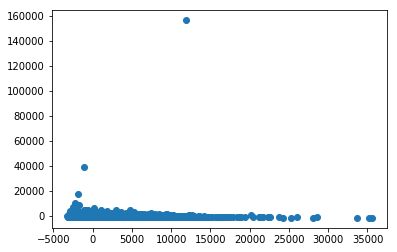

In [20]:
###########
# projecting data in 2D
###########

pca_proj1=PCA(n_components=2)
data_2d=pca_proj1.fit_transform(data)

plt.scatter(data_2d[:,0],data_2d[:,1])

### Outliers hamper PCA analysis

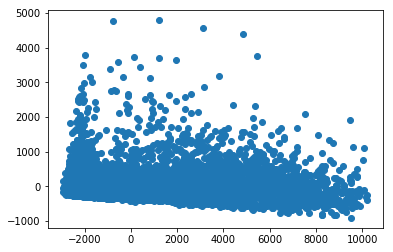

In [21]:
from scipy import stats

###########
# Analyzing and Removing outliers via Z-score method
###########

data_zscore = stats.zscore(data,axis=0)

outliers_ids = np.where(np.abs(data_zscore)>3)[0]
non_outliers_ids = [i for i in range(data.shape[0]) if i not in outliers_ids]
data_filtered = data[non_outliers_ids,:]


pca_proj2=PCA(n_components=2)
data_2d_filtered=pca_proj2.fit_transform(data_filtered)

plt.scatter(data_2d_filtered[:,0],data_2d_filtered[:,1])

[7.34750912e+06 1.84225311e+05 4.00646927e+04 1.24929578e+02
 5.89250203e+01 4.59193682e+01 6.11281756e+00 4.11406834e+00
 2.36861270e+00 1.39556050e+00]
[9.70347003e-01 2.43296708e-02 5.29113388e-03 1.64987943e-05
 7.78191846e-06 6.06433017e-06 8.07287762e-07 5.43323433e-07
 3.12810259e-07 1.84304358e-07]


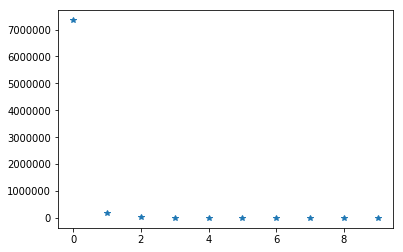

In [23]:
#############
# amount of explained variance 
#############

data_pca = PCA(svd_solver='full')
#data_pca.fit(data[1:])
data_pca.fit(data_filtered)
print(data_pca.explained_variance_)
print(data_pca.explained_variance_ratio_)

plt.plot(data_pca.explained_variance_, '*')

In [31]:
#######
# finding the most relevant attributes
#######

print(np.abs(data_filtered_pca.components_[0:2,:]))

rel_attrib = np.argsort(np.abs(data_filtered_pca.components_[0:2,:]))
print(rel_attrib.shape)

print([columns[i] for i in rel_attrib[0:2,0:3].ravel()])


[[2.81962680e-02 8.61938556e-05 5.19995307e-04 1.26582951e-03
  4.93785539e-05 2.22355880e-04 4.86746307e-04 3.44157577e-03
  3.89437357e-01 9.20613655e-01]
 [9.76689405e-01 4.98003140e-04 1.11449286e-03 1.17021044e-03
  8.22791696e-06 1.75155310e-04 7.37918456e-04 1.50024932e-03
  1.85319081e-01 1.08300315e-01]]
(2, 10)
['LixoADEQUADO', 'AguaADEQUADA', 'Analfa10a14anos', 'LixoADEQUADO', 'Analfa10a14anos', 'AguaADEQUADA']
